<a href="https://colab.research.google.com/github/YichengShen/rl-auto-stock-trading/blob/main/519_project_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Assign csv to curves

In [ ]:
baseline = pd.read_csv("baseline_return.csv")
high_list = ["100_0.001_high.csv",
             "400_0.001_high.csv",
             "none_0.01_high.csv",
             "none_0.02_high_v1.csv"]

high_list.sort(key=lambda name: pd.read_csv(name)["account_value"].values[-1], reverse=True)
high_list

['none_0.02_high_v1.csv',
 'none_0.01_high.csv',
 '100_0.001_high.csv',
 '400_0.001_high.csv']

In [ ]:
threshold_400 = pd.read_csv(high_list[0])
pivot = pd.read_csv(high_list[1])
old_df_result = pd.read_csv(high_list[2])
cost_001 = pd.read_csv(high_list[3])
cost_002 = pd.read_csv("100_0.001_same_v1.csv")
threshold_100 = pd.read_csv("100_0.001_low_v1.csv")

In [ ]:
def get_final_return(df):
    return df["account_value"].values[-1] / df["account_value"].values[0]

return_dict = {
    "baseline": baseline["return_rate"].values[-1],
    "pivot": get_final_return(pivot),
    "old_df_result": get_final_return(old_df_result),
    "threshold_400": get_final_return(threshold_400),
    "threshold_100": get_final_return(threshold_100),
    "cost_001": get_final_return(cost_001),
    "cost_002": get_final_return(cost_002)
}
return_dict

{'baseline': 1.26925493838966,
 'pivot': 1.339589399070816,
 'old_df_result': 1.3067864074503808,
 'threshold_400': 1.3657256311451715,
 'threshold_100': 1.2636370802305943,
 'cost_001': 1.291647339899399,
 'cost_002': 1.2986251895660144}

In [ ]:
pivot.head(3)

,Unnamed: 0,date,account_value
0,0,2020-08-01,1000000.000000
1,1,2020-08-02,997724.863233
2,2,2020-08-03,995613.307584


In [ ]:
pivot.tail(3)

,Unnamed: 0,date,account_value
423,423,2021-09-28,1.350895e+06
424,424,2021-09-29,1.363831e+06
425,425,2021-09-30,1.339589e+06


## Set plot parameters

In [ ]:
plot_w = 12
plot_h = 6

## Plot over df version

In [ ]:
def plot_df_version_diff(new_df, old_df, baseline):
    plt.plot(pd.to_datetime(baseline["date"]), baseline["return_rate"], label="Baseline", color='gray')
    plt.plot(pd.to_datetime(old_df["date"]), old_df["account_value"] / old_df["account_value"][0],
             label="Config 1 (dataset=old)")
    plt.plot(pd.to_datetime(new_df["date"]), new_df["account_value"] / new_df["account_value"][0],
             label="Config 2 (dataset=new)",
             color="green")
    
    plt.title("Comparison 1: Cumulative returns over different training datasets")
    plt.xlabel("Date")
    plt.ylabel("Cumulative return ratio")
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=100))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.gcf().set_size_inches(plot_w, plot_h)
    plt.legend()
    plt.show()

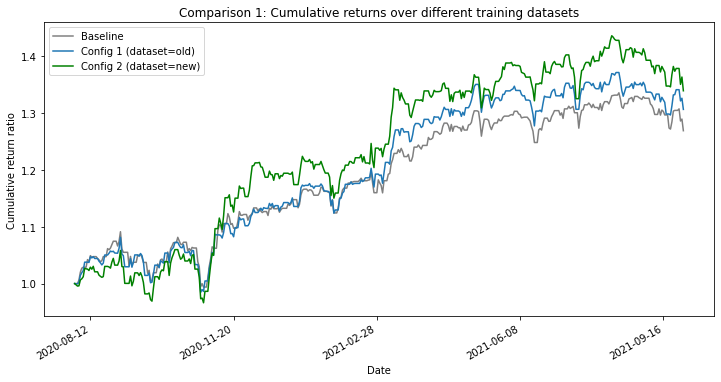

In [ ]:
plot_df_version_diff(pivot, old_df_result, baseline)

## Plot over threshold

In [ ]:
def plot_threshold_diff(thresh1, thresh2, pivot, baseline):
    plt.plot(pd.to_datetime(baseline["date"]), baseline["return_rate"], label="Baseline", color='gray')
    plt.plot(pd.to_datetime(pivot["date"]), pivot["account_value"] / pivot["account_value"][0],
             label="Config 2 (turbulence threshold=None)",
             color="green")
    plt.plot(pd.to_datetime(thresh1["date"]), thresh1["account_value"] / thresh1["account_value"][0],
             label="Config 3 (turbulence threshold=400)")
    plt.plot(pd.to_datetime(thresh2["date"]), thresh2["account_value"] / thresh2["account_value"][0],
             label="Config 4 (turbulence threshold=100)")
    
    plt.title("Comparison 2: Cumulative returns over different turbulence thresholds")
    plt.xlabel("Date")
    plt.ylabel("Cumulative return ratio")
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=100))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.gcf().set_size_inches(plot_w, plot_h)
    plt.legend()
    plt.show()

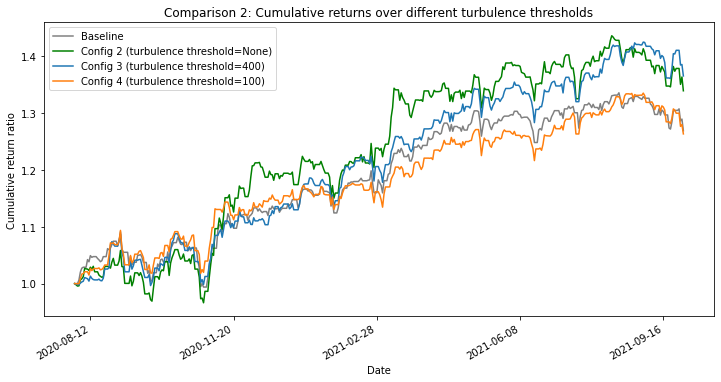

In [ ]:
plot_threshold_diff(threshold_400, threshold_100, pivot, baseline)

## Plot over transaction cost

In [ ]:
def plot_transaction_cost_diff(cost1, cost2, pivot, baseline):
    plt.plot(pd.to_datetime(baseline["date"]), baseline["return_rate"], label="Baseline", color='gray')
    plt.plot(pd.to_datetime(pivot["date"]), pivot["account_value"] / pivot["account_value"][0],
             label="Config 2 (transaction cost=0.001)",
             color="green")
    plt.plot(pd.to_datetime(cost1["date"]), cost1["account_value"] / cost1["account_value"][0],
             label="Config 5 (transaction cost=0.01)")
    plt.plot(pd.to_datetime(cost2["date"]), cost2["account_value"] / cost2["account_value"][0],
             label="Config 6 (transaction cost=0.02)")
    
    plt.title("Comparison 3: Cumulative returns over different transaction costs")
    plt.xlabel("Date")
    plt.ylabel("Cumulative return ratio")
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=100))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.gcf().set_size_inches(plot_w, plot_h)
    plt.legend()
    plt.show()

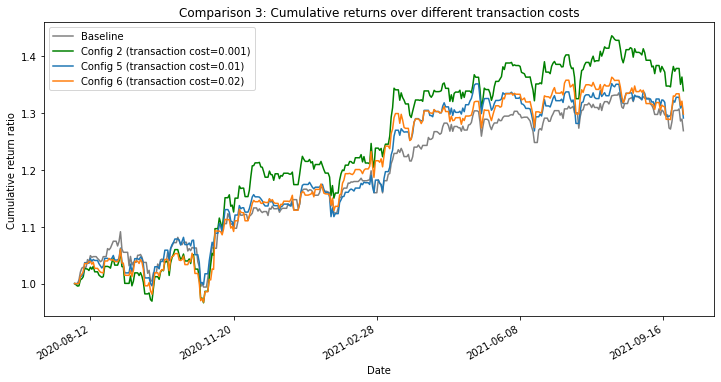

In [ ]:
plot_transaction_cost_diff(cost_001, cost_002, pivot, baseline)